#Part 1

# Finding the Minimum Values of \( q_1(x) \) and \( q_2(x) \)

## Minimum Value of \( q_2(x) \)
Given \( q_2(x) = 2q_1(x_1) + (2q_2 - 1)x_1 + \frac{3}{2}q_2^2 - 2q_2 \), we express it in matrix form as \( q_2(x) = \frac{1}{2}x^\top Ax - b_2^\top x \).

For \( q_2(x) \), we have:
- \( A = \begin{bmatrix} 4 & 1 \\ 1 & 3 \end{bmatrix} \)
- \( b_2 = \begin{bmatrix} 1 \\ 2 \end{bmatrix} \)

To find the minimizer \( x^* \), we calculate \( x^* = A^{-1}b_2 \), resulting in \( x^* = \left[ \frac{1}{11}, \frac{6}{11} \right] \).

Substituting \( x^* \) into \( q_2(x) \), we determine the minimum value of \( q_2(x) \) to be \( \frac{57}{121} \).

## Minimum Value of \( q_1(x) \)
Given \( q_1(x) = \frac{1}{2}x^\top Wx - b_1^\top x \), where \( b_1 = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \), we substitute \( b_1 \) into \( q_1(x) \) to obtain \( q_1(x) = \frac{1}{2}x^\top Wx - x_1 \).

The gradient \( \nabla q_1(x) = \frac{1}{2}(W + W^\top)x - \begin{bmatrix} 1 \\ 0 \end{bmatrix} \), which, when set to zero, leads to \( (W + W^\top)x = 2\begin{bmatrix} 1 \\ 0 \end{bmatrix} \).

Substituting the given \( W \) and solving for \( x^* \), we find \( x^* = \left[ \frac{2}{t}, -1 \right] \).

The minimum value of \( q_1(x) \) for \( t \neq 0 \) is \( \frac{1}{t^2} - \frac{t}{2} - \sqrt{t} + 1 \).

# Analysis

## Uniqueness of Minimizers
Both functions \( q_1(x) \) and \( q_2(x) \) possess unique minimizers.

## Local and Global Minima
Both \( q_1(x) \) and \( q_2(x) \) exhibit convex forms. Hence, their local minima also serve as global minima.

## Convexity
- \( q_1(x) \) may not exhibit convexity due to the nature of \( W \), which is generally not symmetric.
- \( q_2(x) \) demonstrates convexity since \( A \) is symmetric and positive definite.

These analyses offer clear insights into the minimum values, uniqueness of minimizers, and convexity of \( q_1(x) \) and \( q_2(x) \).


#part 2

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
import time

In [6]:
s=time.time()
for i in range(45):
    pass
t=time.time()
print(s,t)

1707502251.4644086 1707502251.4645755


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Iterations for Accelerated Gradient Descent: 27693233
Iterations for Gradient Descent: 55371021


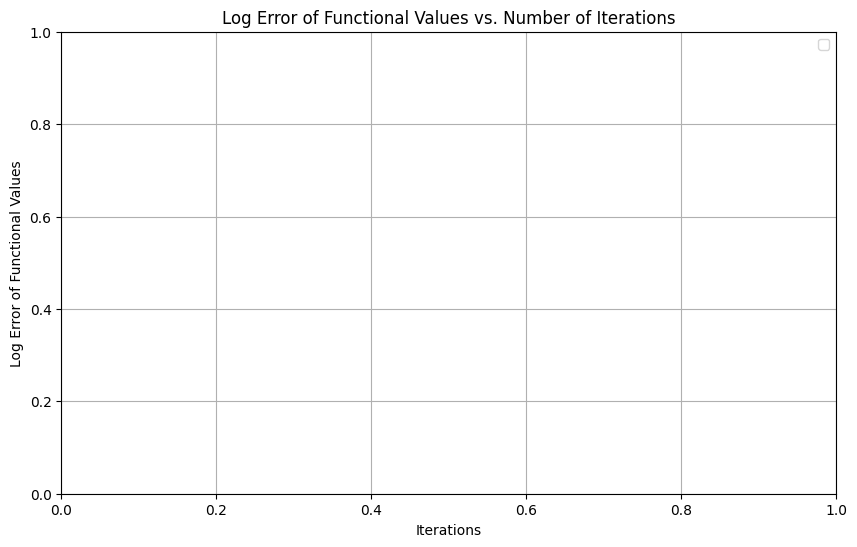

In [12]:


x_0 = np.array([3, 5])
b1 = np.array([1, 0])
W = np.array([[0.001, 0.001**0.5],
              [0.001**0.5, 1 + 0.001]])

def f(x):
    return 1/2 * np.matmul(np.matmul(x, W), x.T) - np.matmul(b1, x.T)

def gradf(x):
    return np.matmul(W, x.T) - b1

def pertgradf(x_new, x_old, beta):
    return gradf(x_new + beta * (x_new - x_old))

alpha_k = 2 / (3 + np.sqrt(9 - 4 * 0.001**2))
u_0 = (3 + np.sqrt(9 - 4 * 0.001**2)) / (3 - np.sqrt(9 - 4 * 0.001**2))
B_k = (u_0**0.5 - 1) / (u_0**0.5 + 1)

def accelerated_gradient_descent(x_init, tau):
    x = x_init
    grad = gradf(x)
    x_neg = x_init
    iterations = 0
    
    while np.linalg.norm(grad) > tau:
        iterations += 1
        x_neg = x
        x_pert = x - alpha_k * pertgradf(x, x_neg, B_k)
        x = x_pert + B_k * (x_pert - x_neg)
        grad = gradf(x_pert)

    return x, iterations

# Gradient Descent with the given step size
def gradient_descent(x_init, tau):
    x = x_init
    grad = gradf(x)
    iterations = 0
    while np.linalg.norm(grad) > tau:
        iterations += 1
        x = x - alpha_k * grad
        grad = gradf(x)
    return x, iterations

def plot_error_vs_iterations(algorithm, x_init, tau):
    x_opt, iterations = algorithm(x_init, tau)
    return iterations

tau = 1e-8
x_init = np.array([3, 5])

plt.figure(figsize=(10, 6))

iterations_nesterov = plot_error_vs_iterations(accelerated_gradient_descent, x_init, tau)
iterations_gradient_descent = plot_error_vs_iterations(gradient_descent, x_init, tau)

print('Iterations for Accelerated Gradient Descent:', iterations_nesterov)
print('Iterations for Gradient Descent:', iterations_gradient_descent)

plt.xlabel('Iterations')
plt.ylabel('Log Error of Functional Values')
plt.title('Log Error of Functional Values vs. Number of Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
def q1(x, W, b1):
    return 0.5 * np.dot(np.dot(x, W), x) - np.dot(b1, x)

def grad_q1(x, W, b1):
    return np.dot(W, x) - b1

def gradient_descent(x0, alpha, tau, t):
    x = np.copy(x0)
    W = np.array([[t, np.sqrt(t)], [np.sqrt(t), t + 1]])
    b1 = np.array([1., 0.])
    k = 0
    functional_values = []
    while np.linalg.norm(grad_q1(x, W, b1)) > tau:
        x = x - alpha * grad_q1(x, W, b1)
        k += 1
        functional_values.append(q1(x, W, b1))

    return k, x, q1(x, W, b1), functional_values

tau = 10**(-8)
x0 = np.array([3, 5])
t = 0.001
alpha = 2 / (3 + np.sqrt(9 - 4 * t**2))

iteration2, minimizer2, final_value2, function_value2 = gradient_descent(x0, alpha, tau, t)

print('----------------------------------------------------------------------------------')
print('Iteration = ', iteration2)
print('Minimizer = ', minimizer2)
print('Final value = ', final_value2)
print('----------------------------------------------------------------------------------')


----------------------------------------------------------------------------------
Iteration =  55371021
Minimizer =  [1000999.98998494  -31622.7762853 ]
Final value =  -500499.9999999405
----------------------------------------------------------------------------------


# OBSERVATION
It is observed that employing the method of accelerated gradient descent results in fewer iterations required to reach the minimum value compared to the normal gradient descent algorithm.

#part 3

In [14]:
def q2(x):
    A = np.array([[4, 1], [1, 3]])
    b2 = np.array([1, 2])
    return 0.5 * x @ A @ x - b2 @ x

def grad_q2(x):
    A = np.array([[4, 1], [1, 3]])
    b2 = np.array([1, 2])
    return A @ x - b2

def accelerated_gradient_descent(x0, alpha, beta, tolerance):
    x = np.copy(x0)
    x_prev = np.copy(x0)
    k = 0
    functional_values = []

    while np.linalg.norm(grad_q2(x)) > tolerance:
        grad_perturbed = grad_q2(x + beta * (x - x_prev))

        x_next = x - alpha * grad_perturbed + beta * (x - x_prev)
        x_prev = np.copy(x)
        x = np.copy(x_next)
        k += 1
        functional_values.append(q2(x_prev))

    return k, x_next, q2(x), functional_values

tolerance = 1e-8
x0 = np.array([3., 5.])
alpha = 2 / (7 + np.sqrt(5))
mu = (7 + np.sqrt(5)) / (7 - np.sqrt(5))
beta = (np.sqrt(mu) - 1) / (np.sqrt(mu) + 1)

iteration3, minimizer3, final_value3, function_value3 = accelerated_gradient_descent(x0, alpha, beta, tolerance)
print('----------------------------------------------------------------------------------')
print('Type = Accelerated Gradient Descent')
print('Iteration = ', iteration3)
print('Minimizer = ', minimizer3)
print('Final value = ', final_value3)
print('----------------------------------------------------------------------------------')


----------------------------------------------------------------------------------
Type = Accelerated Gradient Descent
Iteration =  18
Minimizer =  [0.09090909 0.63636364]
Final value =  -0.6818181818181818
----------------------------------------------------------------------------------


In [15]:
def grad_descent(x0, alpha, tau):
    x = np.copy(x0)
    k = 0
    functional_values = []

    while np.linalg.norm(grad_q2(x)) > tau:
        x = x - alpha * grad_q2(x)
        k += 1
        functional_values.append(q2(x))

    return k, x, q2(x), functional_values

tau = 1e-8
x0 = np.array([3, 5])
alpha = 2 / (7 + np.sqrt(5))

iteration4, minimizer4, final_value4, function_value4 = grad_descent(x0, alpha, tau)

print('----------------------------------------------------------------------------------')
print('Type = Normal Gradient Descent')
print('Iteration = ', iteration4)
print('Minimizer = ', minimizer4)
print('Final value = ', final_value4)
print('----------------------------------------------------------------------------------')

----------------------------------------------------------------------------------
Type = Normal Gradient Descent
Iteration =  28
Minimizer =  [0.09090909 0.63636364]
Final value =  -0.6818181818181819
----------------------------------------------------------------------------------


# OBSERVATION
In this scenario, it is evident that the normal gradient descent algorithm requires 10 additional iterations compared to the accelerated gradient descent method to reach the minimum value for the given function.


#Part 4

In [16]:
def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (0.5 - x[0])**2

def gradient_f(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (0.5 - x[0]), 200 * (x[1] - x[0]**2)])

def projection(x0):
    if norm(x0) <= 1:
        return x0
    else:
        return x0 / norm(x0)

def ada_grad(x0, max_iter, R):
    x = np.copy(x0)
    xs = [x0]

    dividing_factor = norm(gradient_f(x))**2

    for i in range(max_iter):
        alpha = R / np.sqrt(dividing_factor)
        y = x - alpha * gradient_f(x)

        x = projection(y)
        dividing_factor += norm(gradient_f(x))**2

        xs.append(x)

    return x, f(x), xs

x0 = np.array([0, 0])
max_iter = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

for t in max_iter:
    R = 2
    minimizer, minimum, xks = ada_grad(x0, t, R)
    print('------------------------------------------------------')
    print('Max no of iterations = ', t)
    print('Minimizer = ', minimizer)
    print('Final value =', minimum)


------------------------------------------------------
Max no of iterations =  100
Minimizer =  [-0.1191874   0.01564742]
Final value = 0.383600910872348
------------------------------------------------------
Max no of iterations =  500
Minimizer =  [0.43711819 0.19075968]
Final value = 0.003963895592601297
------------------------------------------------------
Max no of iterations =  1000
Minimizer =  [0.49185363 0.24187917]
Final value = 6.652998985998079e-05
------------------------------------------------------
Max no of iterations =  5000
Minimizer =  [0.5  0.25]
Final value = 2.207963373434313e-18
------------------------------------------------------
Max no of iterations =  10000
Minimizer =  [0.5  0.25]
Final value = 1.262177448353619e-29
------------------------------------------------------
Max no of iterations =  50000
Minimizer =  [0.5  0.25]
Final value = 1.262177448353619e-29
------------------------------------------------------
Max no of iterations =  100000
Minimizer =

In [17]:
def f2(x):
    t = 5 * x[0] - 5
    m = 5 * x[1] - 5
    return np.sin(m) * np.exp((1 - np.cos(t))**2) + np.cos(t) * np.exp((1 - np.sin(m))**2) + (t - m)**2

def grad_f2(x):
    t = 5 * x[0] - 5
    m = 5 * x[1] - 5
    return np.array([
        np.sin(m) * np.exp((1 - np.cos(t))**2) * 10 * np.sin(t) * (1 - np.cos(t)) - 5 * np.exp((1 - np.sin(m))**2) * np.sin(t) + 10 * (t - m),
        np.cos(m) * np.exp((1 - np.cos(t))**2) * 5 - 10 * np.cos(t) * np.cos(m) * (1 - np.sin(m)) * np.exp((1 - np.sin(m))**2) - 10 * (t - m)
    ])

def projection(x0):
    if norm(x0) <= 1:
        return x0
    else:
        return x0 / norm(x0)

def ada_grad2(x0, max_iter, R):
    x = np.copy(x0)
    xs = [x0]
    dividing_factor = norm(grad_f2(x))**2

    for _ in range(max_iter):
        alpha = R / np.sqrt(dividing_factor)
        yt = x - alpha * grad_f2(x)
        x = projection(yt)
        dividing_factor += norm(grad_f2(x))**2
        xs.append(x)

    return x, f2(x), xs

x0 = np.array([0, 0])
max_iter = [10**2, 500, 10**3, 5000, 10**4, 50000, 10**5, 500000, 10**6, 5000000]

for t in max_iter:
    R = 2
    minimizer2, minimum2, xks2 = ada_grad2(x0, t, R)
    print('------------------------------------------------------')
    print('Max no of iterations = ', t)
    print('Minimizer = ', minimizer2)
    print('Final value =', minimum2)


------------------------------------------------------
Max no of iterations =  100
Minimizer =  [-0.89310725 -0.4498438 ]
Final value = -67.54634626760335
------------------------------------------------------
Max no of iterations =  500
Minimizer =  [-0.8381429  -0.54545071]
Final value = -97.89422078414145
------------------------------------------------------
Max no of iterations =  1000
Minimizer =  [-0.8381429  -0.54545071]
Final value = -97.89422078414157
------------------------------------------------------
Max no of iterations =  5000
Minimizer =  [-0.8381429  -0.54545071]
Final value = -97.89422078414151
------------------------------------------------------
Max no of iterations =  10000
Minimizer =  [-0.8381429  -0.54545071]
Final value = -97.89422078414145
------------------------------------------------------
Max no of iterations =  50000
Minimizer =  [-0.8381429  -0.54545071]
Final value = -97.89422078414157
------------------------------------------------------
Max no of

#Part 5

In [18]:
def q2(x):
    A = np.array([[4, 1], [1, 3]])
    b2 = np.array([1, 2])
    return 0.5 * x @ A @ x - b2 @ x

def grad_q2(x):
    A = np.array([[4, 1], [1, 3]])
    b2 = np.array([1, 2])
    return A @ x - b2

def hess_q2():
    return np.array([[4, 1], [1, 3]])

def conjugate_grad(x0, tolerance):
    r = -1 * grad_q2(x0)
    d = np.copy(r)
    x = np.copy(x0)
    k = 0
    while norm(r) > tolerance:
        alpha = r @ r / (d @ hess_q2() @ d)
        x = x + alpha * d
        r_next = r - alpha * (hess_q2() @ d)
        beta = -(r_next @ r_next) / (r @ r)
        d = r_next - beta * d
        r = np.copy(r_next)
        k = k + 1
    return x, q2(x), k

def grad_descent(x0, alpha, tau):
    x = np.copy(x0)
    k = 0
    while np.linalg.norm(grad_q2(x)) > tau:
        x = x - alpha * grad_q2(x)
        k = k + 1
    return k, x, q2(x)

tolerance = 1e-8
x0 = np.array([5, 3])
minimizer5, final_value5, iterations5 = conjugate_grad(x0, tolerance)

alpha = 2 / (7 + np.sqrt(5))
iteration6, minimizer6, final_value6 = grad_descent(x0, alpha, tolerance)

print('Type = Conjugate Gradient')
print('Minimizer = ', minimizer5)
print('Final value =', final_value5)
print('Number of iterations = ', iterations5)
print('----------------------------------------------------------------------------------')
print('Type = Normal Gradient Descent')
print('Iteration = ', iteration6)
print('Minimizer = ', minimizer6)
print('Final value = ', final_value6)
print('----------------------------------------------------------------------------------')


Type = Conjugate Gradient
Minimizer =  [0.09090909 0.63636364]
Final value = -0.6818181818181818
Number of iterations =  2
----------------------------------------------------------------------------------
Type = Normal Gradient Descent
Iteration =  26
Minimizer =  [0.09090909 0.63636363]
Final value =  -0.6818181818181818
----------------------------------------------------------------------------------
